# Nomis Solutions - Team 7

In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [3]:
eCar_df = pd.read_csv('Nomis Solutions_Data Part I.csv', encoding="utf-8-sig")

In [4]:
eCar_df.head()

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0


In [5]:
eCar_df.shape

(208088, 12)

In [6]:
eCar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208088 entries, 0 to 208087
Data columns (total 12 columns):
Tier                208085 non-null float64
FICO                208087 non-null float64
Approve Date        208085 non-null object
Term                208085 non-null float64
Amount              208085 non-null float64
Previous Rate       208077 non-null object
Car  Type           208085 non-null object
Competition rate    208085 non-null float64
Outcome             208085 non-null float64
Rate                208085 non-null float64
Cost of Funds       208085 non-null float64
Partner Bin         208085 non-null float64
dtypes: float64(9), object(3)
memory usage: 19.1+ MB


In [7]:
def lowercase_df(df):
    """
    Function to lowercase and replace periods, colon & spaces in the column names of a dataframe.
    """
    new_names = []
    for col in df.columns:
        new_names.append(col.replace('.', '', len(col)).replace('  ', '_', len(col)).replace(' ', '_', len(col)).replace(':','_', len(col)).lower())

    df.columns = new_names
    return df.columns

In [8]:
eCar_df.columns = lowercase_df(eCar_df)

In [9]:
eCar_df.head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0


In [10]:
eCar_df.isnull().values.any()

True

In [11]:
pd.isnull(eCar_df).sum() 

tier                 3
fico                 1
approve_date         3
term                 3
amount               3
previous_rate       11
car_type             3
competition_rate     3
outcome              3
rate                 3
cost_of_funds        3
partner_bin          3
dtype: int64

In [12]:
eCar_df.dropna(inplace=True)

In [13]:
eCar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208077 entries, 0 to 208078
Data columns (total 12 columns):
tier                208077 non-null float64
fico                208077 non-null float64
approve_date        208077 non-null object
term                208077 non-null float64
amount              208077 non-null float64
previous_rate       208077 non-null object
car_type            208077 non-null object
competition_rate    208077 non-null float64
outcome             208077 non-null float64
rate                208077 non-null float64
cost_of_funds       208077 non-null float64
partner_bin         208077 non-null float64
dtypes: float64(9), object(3)
memory usage: 20.6+ MB


In [14]:
pd.isnull(eCar_df).sum() 

tier                0
fico                0
approve_date        0
term                0
amount              0
previous_rate       0
car_type            0
competition_rate    0
outcome             0
rate                0
cost_of_funds       0
partner_bin         0
dtype: int64

In [15]:
#Have the user enter the cost of the loan, the interest rate, and
#the number of years for the loan
#Calculate monthly payments with the following formula
# M = L[i(1+i)n] / [(1+i)n-1]
# M = monthly payment
# L = Loan amount
# i = interest rate (for an interest rate of 5%, i = 0.05)
# n = number of payments
#________________________________________________________________________#
#Start of program
#Declare variables

#def monthly_loan_payments(loan_amount,interest_rate,number_payments): 
#    monthly_payment = (loan_amount * (1 + interest_rate/100)**
#(number_payments/12))/number_payments
    #print("Your monthly payment will be " + str(monthlypayment))
#    return monthly_payment

def monthly_loan_payment(row):
    loan_amount = row['amount']
    interest_rate = row['rate']
    number_payments = row['term']
    monthly_payment = (loan_amount*(1+interest_rate/100)**(number_payments/12))/number_payments
    return monthly_payment

In [16]:
eCar_df['monthly_payment'] = eCar_df.apply(monthly_loan_payment,axis=1)

In [17]:
eCar_df.head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin,monthly_payment
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0,749.797392
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0,870.893808
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0,393.295644
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0,358.864871
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0,825.570014


In [18]:
def npv(row):
    amount = row['amount']
    cost_funds = row['cost_of_funds']/100
    m = row['monthly_payment']* 12
    term = row['term']/12
    
    term = int(term)
    #cash_flow = [m/(1+cost_funds)**n for n in range(1,term+1)]
    
    x = 1/(1+cost_funds)
    net_prof_val = - amount + m*(x/(x - 1))*(x**term  - 1)
    return net_prof_val

In [19]:
eCar_df['NPV'] = eCar_df.apply(npv,axis=1)

In [20]:
eCar_df.head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin,monthly_payment,NPV
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0,749.797392,15674.586950
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0,870.893808,9490.382514
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0,393.295644,4285.856743
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0,358.864871,8838.657498
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0,825.570014,5870.590554


In [21]:
def monthly_loan_payment_competitor(row):
    loan_amount = row['amount']
    interest_rate = row['competition_rate']
    number_payments = row['term']
    monthly_payment = (loan_amount*(1+interest_rate/100)**(number_payments/12))/number_payments
    return monthly_payment

In [22]:
eCar_df['monthly_payment_competitor'] = eCar_df.apply(monthly_loan_payment_competitor,axis=1)

In [23]:
def npv_competitor(row):
    amount = row['amount']
    cost_funds = row['cost_of_funds']/100
    m = row['monthly_payment_competitor']*12
    term = row['term']/12
    
    term = int(term)
    #cash_flow = [m/(1+cost_funds)**n for n in range(1,term+1)]
    x = 1/(1+cost_funds)
    net_prof_val = -amount + m*(x/(x - 1))*(x**term  - 1)
    return net_prof_val

In [24]:
eCar_df['NPV_Competitor'] = eCar_df.apply(npv_competitor,axis=1)

In [25]:
eCar_df.head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin,monthly_payment,NPV,monthly_payment_competitor,NPV_Competitor
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0,749.797392,15674.586950,699.373513,12266.720684
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0,870.893808,9490.382514,877.518433,9866.840852
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0,393.295644,4285.856743,396.287324,4455.865329
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0,358.864871,8838.657498,308.024077,5402.614267
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0,825.570014,5870.590554,830.590093,6100.871867


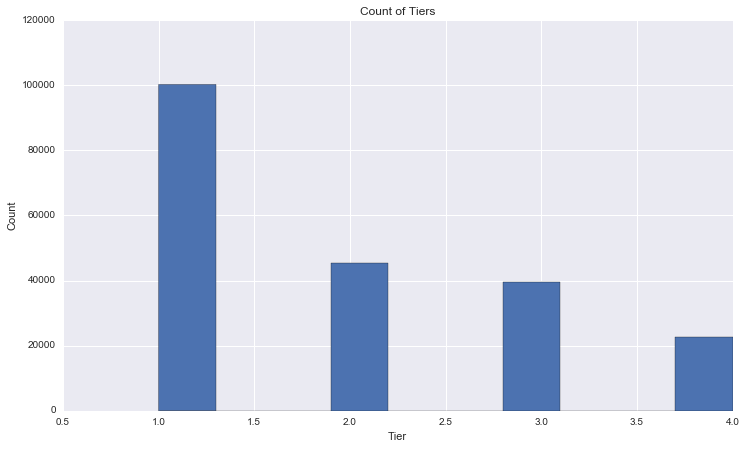

In [26]:
plt.figure(figsize=(12,7))
plt.xlabel('Tier')
plt.ylabel('Count')
plt.title('Count of Tiers')
eCar_df['tier'].hist();

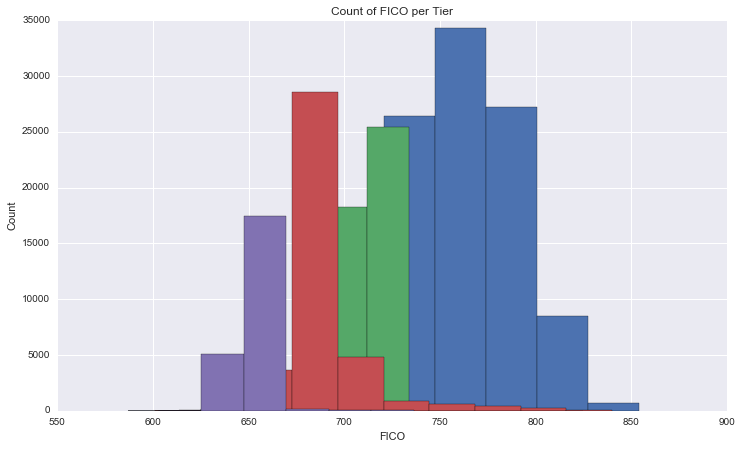

In [27]:
plt.figure(figsize=(12,7))
plt.xlabel('FICO')
plt.ylabel('Count')
plt.title('Count of FICO per Tier')
eCar_df.groupby('tier')['fico'].hist();

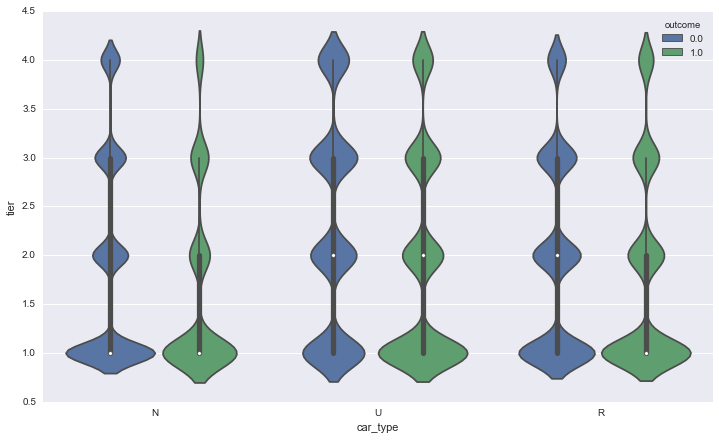

In [28]:
plt.figure(figsize=(12,7))
sns.violinplot(x='car_type', y='tier', data=eCar_df, hue='outcome');

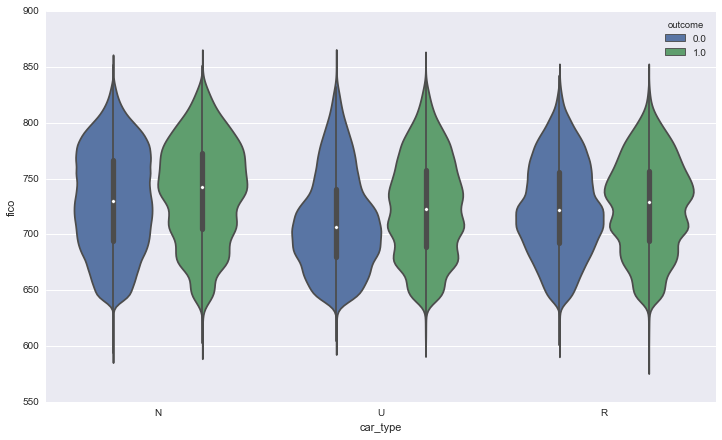

In [29]:
plt.figure(figsize=(12,7))
sns.violinplot(x='car_type', y='fico', data=eCar_df, hue='outcome');

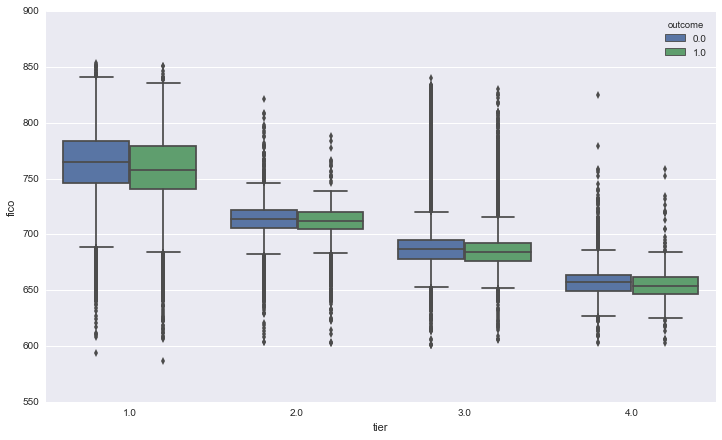

In [30]:
plt.figure(figsize=(12,7))
sns.boxplot(x='tier', y='fico', data=eCar_df, hue='outcome');

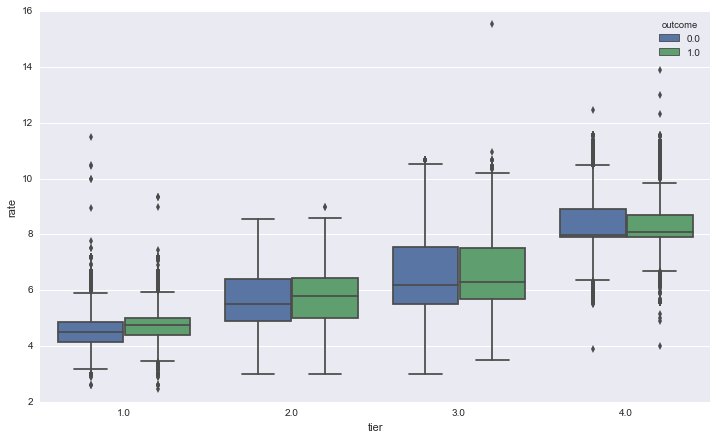

In [31]:
plt.figure(figsize=(12,7))
sns.boxplot(x='tier', y='rate', data=eCar_df, hue='outcome');

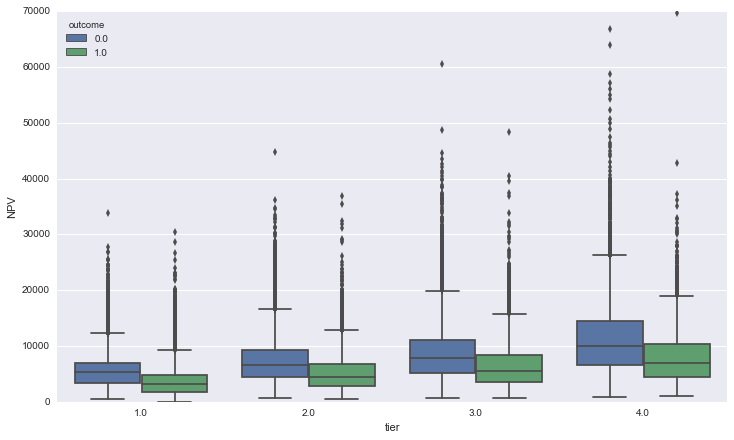

In [32]:
plt.figure(figsize=(12,7))
sns.boxplot(x='tier', y='NPV', data=eCar_df, hue='outcome');

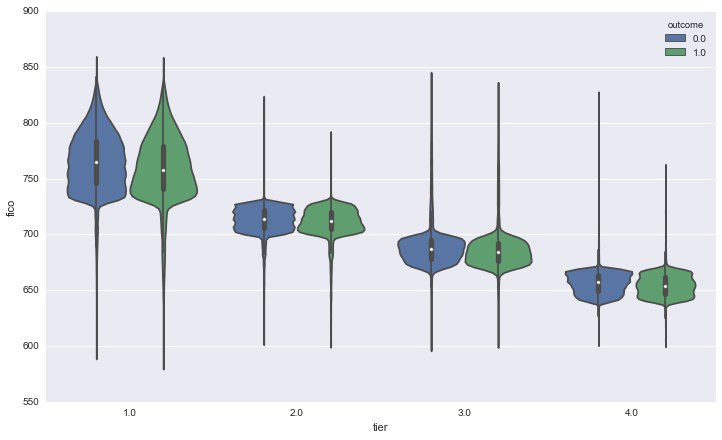

In [33]:
plt.figure(figsize=(12,7))
sns.violinplot(x='tier', y='fico', data=eCar_df, hue='outcome');

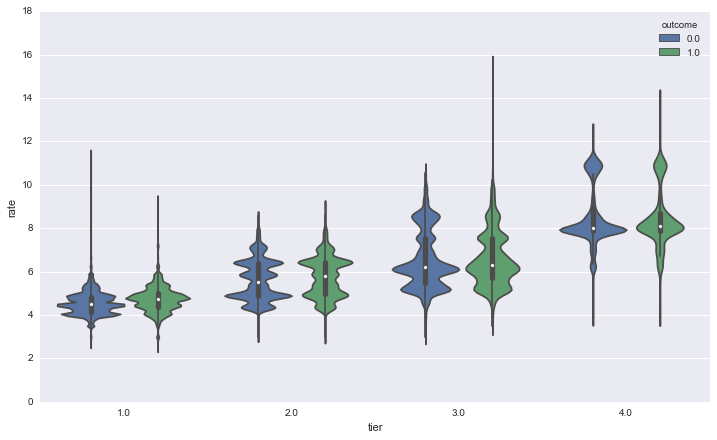

In [34]:
plt.figure(figsize=(12,7))
sns.violinplot(x='tier', y='rate', data=eCar_df, hue='outcome');

## KMeans

In [35]:
eCar_kMeans_df = eCar_df

In [36]:
del eCar_kMeans_df['approve_date']

In [37]:
del eCar_kMeans_df['previous_rate']

In [38]:
eCar_dummy = pd.get_dummies(eCar_kMeans_df['car_type'])

In [39]:
eCar_dummy.head()

,N,R,U
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [40]:
del eCar_dummy['U']

In [41]:
del eCar_kMeans_df['car_type']

In [42]:
kMeans_df = pd.concat([eCar_kMeans_df, eCar_dummy], axis=1)

In [43]:
kMeans_df.head()

,tier,fico,term,amount,competition_rate,outcome,rate,cost_of_funds,partner_bin,monthly_payment,NPV,monthly_payment_competitor,NPV_Competitor,N,R
0,3.0,695.0,72.0,35000.0,6.25,0.0,7.49,1.8388,1.0,749.797392,15674.586950,699.373513,12266.720684,1.0,0.0
1,1.0,751.0,60.0,40000.0,5.65,0.0,5.49,1.8388,3.0,870.893808,9490.382514,877.518433,9866.840852,1.0,0.0
2,1.0,731.0,60.0,18064.0,5.65,0.0,5.49,1.8388,3.0,393.295644,4285.856743,396.287324,4455.865329,1.0,0.0
3,4.0,652.0,72.0,15415.0,6.25,0.0,8.99,1.8388,3.0,358.864871,8838.657498,308.024077,5402.614267,1.0,0.0
4,1.0,730.0,48.0,32000.0,5.65,0.0,5.49,1.8388,1.0,825.570014,5870.590554,830.590093,6100.871867,1.0,0.0


In [44]:
def plot_silhouette(data,clusters):
    '''
    Input:
        data - (DataFrame) Data to cluster on
        clusters - (list) List containing the number of clusters to check for
    Output:
        Plot showing the silhouette score for different numbers of centroids
    '''  
    X = data.values
    list_of_silhouette = []

    for k in clusters:
        km = KMeans(n_clusters=k).fit(X)
        list_of_silhouette.append(silhouette_score(X,km.labels_,metric='euclidean'))
        
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.plot(list_of_silhouette)
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14);